## The Convergence of Markov Chain Monte Carlo Algorithms

Notes by Ian Hoffecker for the Coursera course Statistical Mechanics, Algorithms and Computation taught by Werner Krauth from Ecole Normale Superieure. Credit also to Vivien Lecomte, Alberto Rosso, and Michael Köpf

### key concepts:
correlation time $\tau$

steady state vector and eigen values

transfer matrix

exact solutions to probability vector

irreproducibility and aperiodicity



Continuing with the 3x3 pebble game from the last lecture. We will use the pebble game to illustrate a profound mathematical concept of great practical importance - that the convergence of Markov Chain Monte Carlo algorithms are exponential. 

$e ^{-t / \tau}$

This means that an MCMC algorithm can be characterized bt a timescale - the convergence time $\tau$. It is on this scale that we approach equilibrium - ie when we ask ourselves how close we are to equilibrium in the midst of running the algorithm, we can answer in terms of a factor of $\tau$ to get some idea. For example, after a few times $\tau$, an MCMC algorithm is in equilibrium for all intents and purposes, in the same way that after a few nuclear halflives, a radioactive compound has completely decayed. 

Going back to the pebble game, we first label the 9 sites of the grid starting with 0 in the lower left and ending with 8 in the upper right. 

Reviewing the MCMC algorithm from previously, the process consists of moving a pebble from each square to either the right, left, up, or down with probability 0.25. When a move is not possible, ie because the pebble is next to a boundary, the proposed move is rejected, and the pebble remains in the same position for the next iteration. Repeated from last time is the basic python program:

In [1]:
##basic pebble game
import random
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]
t_max = 15
site = 8
t = 0
print site
while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0,3)]
    print site

8
8
8
8
7
7
4
1
4
7
7
6
7
8
7
8


Take a look at the matrix "neighbor" for a second. It consists of 9 arrays corresponding to the 9 sites on the grid numbered as we did earlier from bottom left to top right. And each element within the array corresponds to the possible moves that can be made from that position. Here, the rejections are actually implicit in the design of this array, because for boundary sites, a "stay" move has been added redundantly eg in the first array [1,3,0,0] from site 0. Keep in mind that this is not related to the Metropolis rejection criterion discussed last time for inhomogeneous cases. Here we are still dealing with the simple homogenous walk, where there are no statistical weights (or energies) at any of the sites. 

As an exercise, let's do some basic probability checks. At time t=0, say we are at site 8, the upper right hand corner, and adjacent to us are sites 7 and 5. At t=1, we can expect to be at either sites 7, 5, or still at 8 with probability 0.25, 0.25, and 0.5 respectively. 

No consider the farthest site from 8, site 0 in the opposite corner of the grid. At what timepoint does the probability of being on that site become finite - ie non-zero? The shortest paths all take at least 4 steps to reach site 0, so assuming we take one of the shortest paths then t=4 when we reach it. 

Now finally, what is the probability to be on site 0 at time t=4, given that the pebble started at site 8 at t=0? The way to figure this out is with joint probabilities. First of all, convince yourself that there are 6 shortest paths that reach site 0 in 4 steps. Two that touch the corner sites 6 or 2 that is {8,7,6,3,0} and {8,5,2,1,0}, two zigzag paths {8,7,4,3,0} and {8,5,4,1,0} and two S shaped paths {8,7,4,1,0} and {8,5,4,3,0}. Each of these paths are exactly 4 steps long. And if we pick a particular node in each of these paths, we see that the probability to move to the next step always occurs with probability $\frac{1}{4}$. Thus the joint probability of all 4 steps in the sequence occuring is $\frac{1}{4} * \frac{1}{4} * \frac{1}{4} * \frac{1}{4}$ and since we have 6 of these available to us, the final probability of ending up in site 0 is $6\Big( \frac{1}{4} * \frac{1}{4} * \frac{1}{4} * \frac{1}{4} \Big)$ or $\frac{6}{4^4}= 6/256$

Now consider a random walk of the pebble game. After t=4 the pebble has a small but finite chance of reach the farthest corner of the grid. And after a certain number of steps, the pebble has wandered around for a while, all the positions become equally likely. 

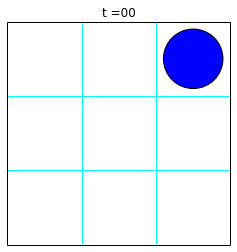

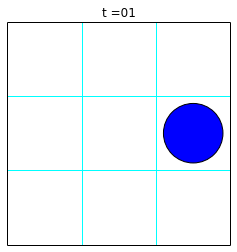

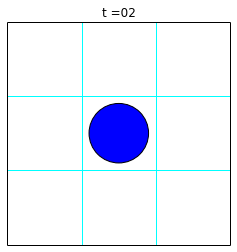

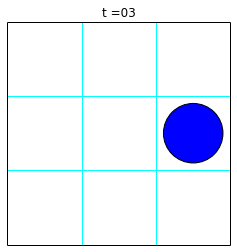

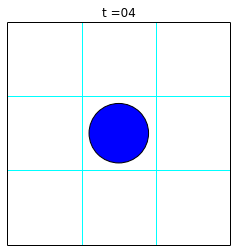

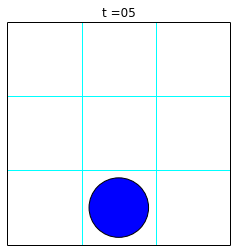

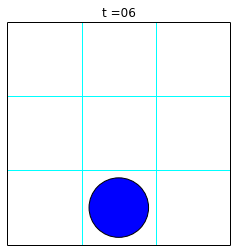

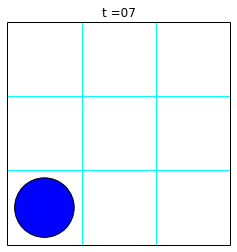

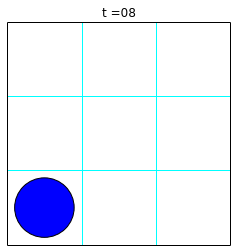

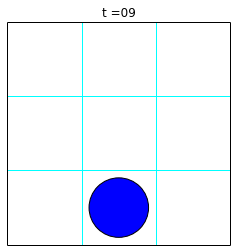

In [9]:
##pebble basic movie
%matplotlib inline
import math, random, pylab

sigma = 0.4 #sigma and s_map are needed dfor the graphical output
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0),
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0),
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)]
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]
site = 8
N_runs = 10
for run in range(N_runs):
    if run < 10: number_string = '0'+str(run)
    else: number_string = str(run) #this bit is for digit size 01 02 03 vs 10 11 12 etc
    #begin graphical output
    cir = pylab.Circle(s_map[site], radius=sigma, fc='blue') #a blue circle of radius sigma
    pylab.gca().add_patch(cir)
    pylab.plot([0.5, 3.5], [1.5, 1.5], 'cyan')
    pylab.plot([0.5, 3.5], [2.5, 2.5], 'cyan')
    pylab.plot([1.5, 1.5], [0.5, 3.5], 'cyan')
    pylab.plot([2.5, 2.5], [0.5, 3.5], 'cyan')
    pylab.title('t ='+ number_string)
    pylab.axis('scaled')
    pylab.axis([0.5, 3.5, 0.5, 3.5])
    pylab.xticks([])
    pylab.yticks([])
    pylab.show()
    pylab.clf()
    site = neighbor[site][random.randint(0,3)]

### Convergence to the steady state

Now let's consider many runs of the random walk, each of which start in the same location. Let's try and get an idea of the average behavior.

In [25]:
##basic pebble game - multirun
import random
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]
t_max = 4
N_runs = 25600
for run in range(N_runs):
    site = 8
    t = 0
    while t < t_max:
        t += 1
        site = neighbor[site][random.randint(0,3)]
    print site

5
6
2
8
2
6
0
8
7
4
8
4
5
6
6
3
5
6
7
7
8
6
6
2
5
5
8
1
4
0
5
5
7
4
2
4
1
8
5
8
2
6
7
2
7
3
7
4
2
2
8
4
6
2
7
8
3
5
4
0
2
2
7
7
6
7
7
5
8
2
4
5
5
7
5
6
7
7
2
6
8
7
3
2
4
2
2
0
5
5
5
7
5
8
8
5
2
5
5
5
6
4
4
2
3
2
3
8
8
6
4
8
4
5
6
5
4
6
3
7
7
1
8
4
8
4
4
2
7
8
7
5
6
5
5
6
7
5
8
7
4
5
5
6
6
6
8
5
5
1
1
8
2
4
3
0
8
4
2
7
7
5
5
8
3
1
5
7
2
6
8
6
8
7
7
7
7
3
8
6
8
7
2
5
8
7
4
8
5
7
2
5
8
4
3
7
5
5
7
8
3
8
2
3
5
1
7
2
6
8
8
4
1
8
3
8
2
4
8
8
5
4
8
7
7
5
4
1
7
1
7
8
5
5
7
8
4
6
8
2
8
7
3
6
8
0
8
8
2
5
6
7
5
8
8
8
3
5
6
8
5
4
7
5
7
4
5
8
7
8
7
5
1
5
8
7
8
6
7
4
4
6
7
6
8
8
8
3
4
3
8
7
2
6
5
8
7
7
8
5
2
7
7
8
8
2
8
5
5
8
8
8
4
4
3
8
6
8
7
6
5
4
8
8
8
7
4
8
6
8
7
4
0
7
4
3
2
6
7
1
4
3
8
6
5
1
7
4
8
8
7
7
5
8
4
8
8
7
5
5
2
7
6
8
8
7
4
8
6
2
7
3
8
8
1
8
6
7
2
8
7
5
8
1
8
5
7
1
5
7
8
5
1
3
8
5
7
5
1
3
6
4
2
1
5
3
8
7
8
8
8
6
4
8
8
7
8
2
2
6
4
8
8
3
2
5
4
4
8
4
7
2
7
2
7
2
8
5
8
8
5
3
4
5
4
5
7
8
5
8
7
5
7
7
4
8
1
8
3
8
8
0
4
5
2
2
6
8
8
6
7
3
2
4
7
1
2
6
8
6
7
8
7
8
0
2
8
8
8
8
3
1
7
5
6
7
2
4
2
2


Above you see the output of the last site for the case when tmax=4. Scanning through it you can see that occaisionally, though seldom, you will see a site 0, reflecting our earlier assertion that site 0 should be reachable with a small probability after 4 steps. If you were to modify this code and replace tmax with 3, you shouldn't see any 0's. 

Now let's use 2D histograms (heat maps) to represent the distribution of pebbles on different sites after a certain time tmax. 

[[ 0.    0.    2.25]
 [ 0.    0.    0.  ]
 [ 0.    0.    0.  ]]
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


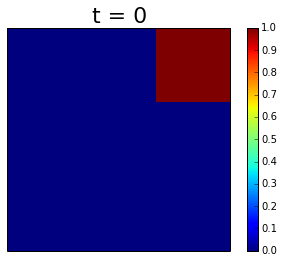

[[ 0.          0.28060875  1.69023375]
 [ 0.          0.          0.2791575 ]
 [ 0.          0.          0.        ]]
[[ 0.        0.124715  0.751215]
 [ 0.        0.        0.12407 ]
 [ 0.        0.        0.      ]]


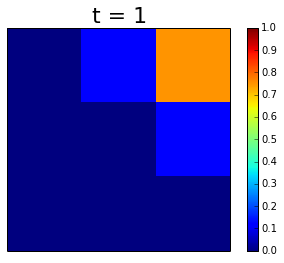

[[ 0.0474375  0.3286575  1.404975 ]
 [ 0.         0.0940275  0.32652  ]
 [ 0.         0.         0.0483825]]
[[ 0.02108333  0.14607     0.62443333]
 [ 0.          0.04179     0.14512   ]
 [ 0.          0.          0.02150333]]


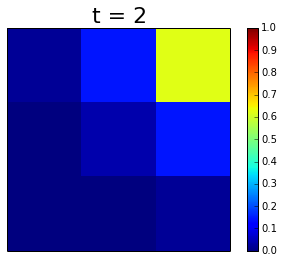

[[ 0.07918313  0.3513825   1.21183312]
 [ 0.02678063  0.12303563  0.35076375]
 [ 0.          0.02669062  0.08033062]]
[[ 0.0351925  0.15617    0.5385925]
 [ 0.0119025  0.0546825  0.155895 ]
 [ 0.         0.0118625  0.0357025]]


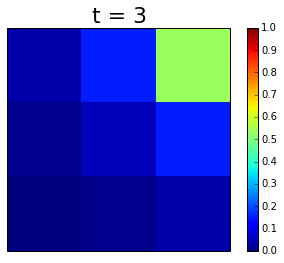

[[ 0.1075725  0.353619   1.073979 ]
 [ 0.045585   0.151569   0.35334  ]
 [ 0.0103905  0.0462105  0.1077345]]
[[ 0.04781   0.157164  0.477324]
 [ 0.02026   0.067364  0.15704 ]
 [ 0.004618  0.020538  0.047882]]


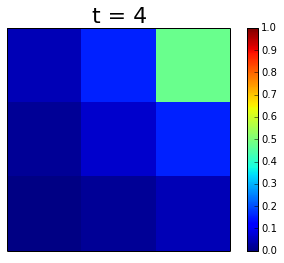

[[ 0.1282275   0.35267625  0.96954   ]
 [ 0.064815    0.16645125  0.3512625 ]
 [ 0.02350125  0.0659625   0.12756375]]
[[ 0.05699     0.156745    0.43090667]
 [ 0.02880667  0.07397833  0.15611667]
 [ 0.010445    0.02931667  0.056695  ]]


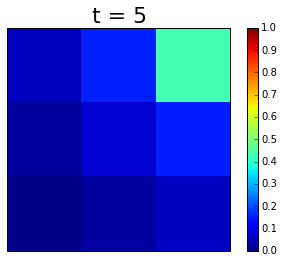

[[ 0.1442475   0.34734214  0.88662536]
 [ 0.08163     0.17916107  0.34567714]
 [ 0.03830143  0.08314393  0.14387143]]
[[ 0.06411     0.15437429  0.39405571]
 [ 0.03628     0.07962714  0.15363429]
 [ 0.01702286  0.03695286  0.06394286]]


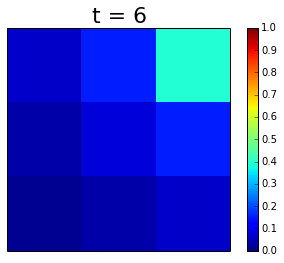

[[ 0.15666469  0.34201688  0.81940219]
 [ 0.09673031  0.18766406  0.34010156]
 [ 0.05248687  0.09806344  0.15687   ]]
[[ 0.06962875  0.1520075   0.36417875]
 [ 0.04299125  0.08340625  0.15115625]
 [ 0.0233275   0.04358375  0.06972   ]]


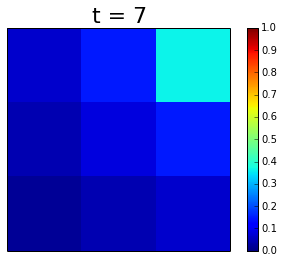

[[ 0.1667175  0.335875   0.7648825]
 [ 0.1095775  0.194765   0.3342025]
 [ 0.0662325  0.1106925  0.167055 ]]
[[ 0.07409667  0.14927778  0.33994778]
 [ 0.04870111  0.08656222  0.14853444]
 [ 0.02943667  0.04919667  0.07424667]]


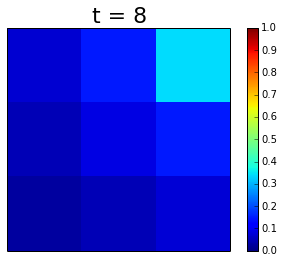

[[ 0.17532     0.33018975  0.7187805 ]
 [ 0.12082275  0.2002365   0.3286395 ]
 [ 0.0789165   0.121986    0.1751085 ]]
[[ 0.07792   0.146751  0.319458]
 [ 0.053699  0.088994  0.146062]
 [ 0.035074  0.054216  0.077826]]


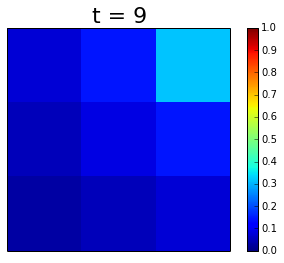

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt

xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 

neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}

list_vec = []
for i in range(0,10): #here tmax is now "run"
    run = i
    if run < 10:  run_str= '0' + str(run)
    else: run_str = str(run)
    for n_runs in range(100000): 
        pos = 9
        for iter in range(run):
            pos = neighbor[pos][ random.randint(0, 3)]
        list_vec.append(pos)

    x = [xvec[k] for k in list_vec]
    y = [yvec[k] for k in list_vec]

    plt.xticks([])
    plt.yticks([])
    H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
               range=[[1,3],[1,3]], normed=True)
    print H
    H /= np.sum(H)
    print H
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    plt.imshow(H, extent=extent, interpolation='nearest', vmin=0.0, vmax=1.0)
    plt.set_cmap('jet')
    plt.colorbar()
    plt.title('t = '+str(run),fontsize=22)
    plt.savefig('3x3_pebble_run_'+run_str+'.png')
    plt.show()

Notice how over time, the pebble diffuses through grid. We can see how the grid approaches a homogeneous state the more time passes. 

## The Transfer Matrix Method

This method will allow us to solve, EXACTLY, the monte carlo dynamics of the 3x3 pebble game. For larger systems, this method does not apply. 

Consider again the probability of finding a pebble in site 8 at t=0 (p=1), t=1 (p=1/2), and so on. We would like to compute the exact probabilities of all the time points. Let's first introduce a vector to store that info - the probabilities to find the pebble at a site at a given time:

\begin{equation}
\pi ^t = 
 \begin{pmatrix}
  \pi _{site 0}^t \\
  \pi _{site 1}^t \\
  \vdots  \\
  \pi _{site 8}^t   
 \end{pmatrix}
\end{equation}

As explained previously, the MCMC algorithm can be thought of simply a matrix (a transfer matrix) of transition probabilities $p(a \rightarrow b)$ for moving from a site $a$ to a site $b$.

In the 3x3 pebble game, this matrix is 9x9 because there are 9 configurations, and we want an element in this matrix for every possible transition.

\begin{equation}
TransferMatrix_{to-row_m,to-column_n} = 
 \begin{pmatrix}
  p(0 \rightarrow 0) & p(1 \rightarrow 0) & \cdots & p(8 \rightarrow 0) \\
  p(0 \rightarrow 1) & p(1 \rightarrow 1) & \cdots & p(8 \rightarrow 1) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  p(0 \rightarrow 8) & p(1 \rightarrow 8) & \cdots & p(8 \rightarrow 8) 
 \end{pmatrix}
\end{equation}

We know these probabilities for the homogeneous case already. eg from site 0 to site 0, the corner site, there is a probability of 1/2 of staying, so the first element of this matrix is 0.5. Let's fill in the whole thing:

In [33]:
transfer_matrix = [[2]]

"It is now crucial to realize that the probability vector at time t+1 is the PRODUCT of the transfer matrix times the probability vector at time t. "

\begin{equation}
\
 \begin{pmatrix}
  \pi _{site 0}^{t+1} \\
  \pi _{site 1}^{t+1} \\
  \vdots  \\
  \pi _{site 8}^{t+1}   
 \end{pmatrix}
 =
 \begin{pmatrix}
  p(0 \rightarrow 0) & p(1 \rightarrow 0) & \cdots & p(8 \rightarrow 0) \\
  p(0 \rightarrow 1) & p(1 \rightarrow 1) & \cdots & p(8 \rightarrow 1) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  p(0 \rightarrow 8) & p(1 \rightarrow 8) & \cdots & p(8 \rightarrow 8) 
 \end{pmatrix}
 \times
 \begin{pmatrix}
  \pi _{site 0}^t \\
  \pi _{site 1}^t \\
  \vdots  \\
  \pi _{site 8}^t   
 \end{pmatrix}
 \
\end{equation}


Whoa...let's think through this a bit. It helps me to remember an 'intuitive guide to linear algebra' from betterexplained.com for this. 

<img src="http://betterexplained.com/wp-content/uploads/images//linear-algebra-pour-20121002-220550.png">

In this case, we're feeding our probability vector on the right into a series of operations, the transfer matrix, to get out our new probability. Consider the element $\pi _0 ^{t+1}$, that is the probability that on the next step, we are in state 0. Intuitively, we can understand this as the sum of probabilities that get us to state 0 on the next step. Each of those are a set of joint probabilities, for example the probability that we are in state 2 and that the transition 2 to 0 occurs. So looking at the matrix multiplication again, we can visualize that this works out as the probability vector "falls" onto each row of the transfer matrix, and the products of those element-wise multiplcations get summed and sent to the output vector.

Let's have it in python now:

$x_k$ the true

In [61]:
import numpy
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]

transfer = numpy.zeros((9,9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = numpy.zeros(9)
position[8] = 1.0
for t in range(100):
    print t, '  ',["%0.3f" % i for i in position],'\n'
    position = numpy.dot(transfer, position)

0    ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '1.000'] 

1    ['0.000', '0.000', '0.000', '0.000', '0.000', '0.250', '0.000', '0.250', '0.500'] 

2    ['0.000', '0.000', '0.062', '0.000', '0.125', '0.188', '0.062', '0.188', '0.375'] 

3    ['0.000', '0.047', '0.078', '0.047', '0.094', '0.188', '0.078', '0.188', '0.281'] 

4    ['0.023', '0.055', '0.098', '0.055', '0.117', '0.160', '0.098', '0.160', '0.234'] 

5    ['0.039', '0.073', '0.103', '0.073', '0.107', '0.152', '0.103', '0.152', '0.197'] 

6    ['0.056', '0.081', '0.108', '0.081', '0.113', '0.140', '0.108', '0.140', '0.175'] 

7    ['0.068', '0.089', '0.109', '0.089', '0.110', '0.134', '0.109', '0.134', '0.157'] 

8    ['0.079', '0.094', '0.110', '0.094', '0.112', '0.128', '0.110', '0.128', '0.146'] 

9    ['0.087', '0.099', '0.111', '0.099', '0.111', '0.124', '0.111', '0.124', '0.137'] 

10    ['0.093', '0.102', '0.111', '0.102', '0.111', '0.120', '0.111', '0.120', '0.130'] 

11    ['0.097', '0.1

Take a moment to appreciate the above. Rather than running a monte carlo for a bazillion time steps to get a close approximation of the probabilities in each time step, we have efficiently solved for the EXACT probabilities. It is as if we ran an infinite number of pebble games. This is possible if we (a) know the transition probabilities, (b) know the initial distribution of the pebble and (c) have a small system with which this kind of matrix multiplication is feasible. 

After a long time, the input probability vector multiplied with the transfer function ceases to change as the system approaches steady state. Recall from linear algebra, a vector input which yields a scalar multiple of the input (or unchanged) as the output is an EIGENVECTOR of that matrix. For our system, the equilibrium probability vector is an eigenvector of the transfer matrix with eigen value 1 since the output is unchanged. ie

$Av = \lambda v = 1v$

Eigenvectors and eigenvalues can be computed on one line in python. In other words, we have a way to efficiently compute the exact steady state probabilities. Let's rewrite the above program to run without any 

In [76]:
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print numpy.sort(eigenvalues)[::-1]



[  1.00000000e+00   7.50000000e-01   7.50000000e-01   5.00000000e-01
   2.50000000e-01   2.50000000e-01  -1.31454544e-17  -6.51989734e-17
  -5.00000000e-01]


Examining the eigenvalues, we see that the largest of them is indeed our eigen value of 1 that we anticipated from the equilibrium value. What are these other eigen values though?? 

What does the second-largest eigen value (0.75) do for us? To see, we shall first consider the output of the site probabilities that we solved for two blocks above as the output of the matrix multiplication. Scroll down and you will see how the site probablities begin to approach the equilibrium value 0.11111. Let us subtract this equilibrium value and take the absolute value, and then examine the output.



In [150]:
import numpy
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]

transfer = numpy.zeros((9,9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = numpy.zeros(9)
position[8] = 1.0

for t in range(100):
    print t, '  ',["%0.9f" % i for i in inverted_position],'\n'
    position = numpy.dot(transfer, position)
    inverted_position = numpy.abs(position-0.11111)

0    ['0.000001111', '0.000001111', '0.000001111', '0.000001111', '0.000001111', '0.000001111', '0.000001111', '0.000001111', '0.000001111'] 

1    ['0.111110000', '0.111110000', '0.111110000', '0.111110000', '0.111110000', '0.138890000', '0.111110000', '0.138890000', '0.388890000'] 

2    ['0.111110000', '0.111110000', '0.048610000', '0.111110000', '0.013890000', '0.076390000', '0.048610000', '0.076390000', '0.263890000'] 

3    ['0.111110000', '0.064235000', '0.032985000', '0.064235000', '0.017360000', '0.076390000', '0.032985000', '0.076390000', '0.170140000'] 

4    ['0.087672500', '0.056422500', '0.013453750', '0.056422500', '0.006077500', '0.049046250', '0.013453750', '0.049046250', '0.123265000'] 

5    ['0.072047500', '0.037867813', '0.008570938', '0.037867813', '0.003688125', '0.041233750', '0.008570938', '0.041233750', '0.086155625'] 

6    ['0.054957656', '0.030543594', '0.003443984', '0.030543594', '0.001682969', '0.028782578', '0.003443984', '0.028782578', '0.063694687'] 


Perfect. Now we see that the probabilities approach 0 as the system approaches equilibrium. If we plot the deviation from zero on a semi-log scale for one (or all) of the sites then we get a straight line!

The slope of this line matches that of the second eigen value raised to the power of t. ie

$(0.75)^t$ indicated by the green line. 

This plot proves both that the convergence to equilibrium is exponential, and that we can compute the second eigen value to quickly understand the timescale or slope of that convergence in log time. 

-0.287540831361


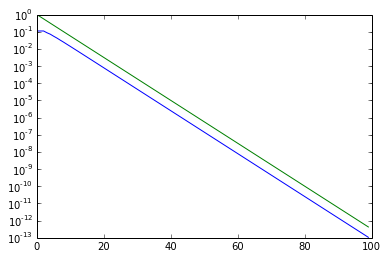

In [152]:
import numpy
from matplotlib import pyplot as plt
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]

transfer = numpy.zeros((9,9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = numpy.zeros(9)
position[8] = 1.0
semilog = numpy.zeros((100))
site_zero = numpy.zeros((100))
eigen_power = numpy.zeros((100))
for t in range(0,100):
    #print t, '  ',["%0.5f" % i for i in inverted_position],'\n'
    position = numpy.dot(transfer, position)
    inverted_position = numpy.abs(position-0.111111111111111)
    site_zero[t] = (inverted_position[0])
    semilog[t] = numpy.log(inverted_position[0])
    eigen_power[t] = numpy.power(.75,t)
plt.semilogy(numpy.linspace(0, 99, num=100),site_zero)
slope, intercept = np.polyfit(numpy.linspace(10,39, num=30), semilog[10:40], 1)
plt.semilogy(numpy.linspace(0, 99, num=100),eigen_power)
print slope

Let's put 0.75 into an exponential.

$0.75^t = exp(\frac{-t}{|ln(0.75)|})$

$       = exp(-\frac{-t}{\tau})$

In [155]:
1/numpy.abs(numpy.log(0.75))

3.4760594967822072

$\frac{1}{\tau} = 3.476$

This value, tau, is the CORRELATION TIME. The characteristic time constant for the convergence of this system to a steady state attractor. The value 0.75 used in this case was obtained as the second largest eigen value.



### Irreducibility and aperiodicity in the markov chain

Another way to summarize the previous section is that the monte carlo dynamics are determined by the decomposition of the probability vector at initial time onto the eigen vectors of the transfer matrix.

$\pi^0 = 1 \times v_1 + \lambda _2 \times v_2 + \dots$

$\pi^t = 1 \times v_1 + \lambda ^t _2 \times v_2 + \dots$

Note above that we replaced the $\lambda _1$ with 1. All eigen values have a modulus less than or equal to one. An eigenvalue larger than 1 would lead to an explosion of the probability vector. At the largest time, the dynamics converge to the eigen value with the largest modulus equal to 1. This is the probability vector of the equilibrium state or steady state. What are the rigorous mathematical conditions that must be satisfied to ensure that one converges at large times to a UNIQUE steady state?

To understand why this is important, we consider an example situation in which a strange result occurs. A system with two copies of the 3x3 pebble game arranged without any communication or transitions possible between the two grids. If one begins in one grid, then one converges to a different steady state than one would if starting in the other grid - a sensitive dependence on the initial conditions. The combined system has 18 sites and the transfer matrix is 18x18 dimension.

In [165]:
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((18, 18))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25     # red pebble game
        transfer[neighbor[k][neigh]+9, k+9] += 0.25 # blue pebble game   
# small transition epsilon between red 2 and blue 6
#epsilon = 0.04
#transfer[6+9,2] = transfer[2,6+9] = epsilon
#transfer[2,2] -= epsilon
#transfer[6+9,6+9] -= epsilon
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print numpy.sort(eigenvalues)[::-1]
 
# you may print the eigenvectors by uncommenting the following four lines
#for iter in range(18):
#    print eigenvalues[iter]
#    for i in range(18):
#        print eigenvectors[i][iter]

[  1.00000000e+00   1.00000000e+00   7.50000000e-01   7.50000000e-01
   7.50000000e-01   7.50000000e-01   5.00000000e-01   5.00000000e-01
   2.50000000e-01   2.50000000e-01   2.50000000e-01   2.50000000e-01
  -1.31454544e-17  -1.31454544e-17  -6.51989734e-17  -6.51989734e-17
  -5.00000000e-01  -5.00000000e-01]


Note the double occurrence of the eigen value 1. One of the rigorous mathematical conditions for markov chain monte carlo is that we not be able to split the transfer matrix into two segements and alter one without affecting the other. Ie that the matrix be IRREDUCIBLE. 

We can introduce reducibility by allowing transitions between the two grids, even with small probability:

In [166]:
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((18, 18))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25     # red pebble game
        transfer[neighbor[k][neigh]+9, k+9] += 0.25 # blue pebble game   
# small transition epsilon between red 2 and blue 6
epsilon = 0.04
transfer[6+9,2] = transfer[2,6+9] = epsilon
transfer[2,2] -= epsilon
transfer[6+9,6+9] -= epsilon
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print numpy.sort(eigenvalues)[::-1]
 
# you may print the eigenvectors by uncommenting the following four lines
#for iter in range(18):
#    print eigenvalues[iter]
#    for i in range(18):
#        print eigenvectors[i][iter]

[  1.00000000e+00   9.92451031e-01   7.50000000e-01   7.50000000e-01
   7.50000000e-01   7.25649298e-01   5.00000000e-01   4.79023434e-01
   2.50000000e-01   2.50000000e-01   2.50000000e-01   2.40311308e-01
   8.22491370e-18  -1.13436713e-17  -1.45338823e-17  -1.50050555e-02
  -5.00000000e-01  -5.02430015e-01]


Note now that we have a unique steady state eigen value - only 1 with a value of 1. The matrix is irreducible.

This conditions is necessary, but insufficient, to guarantee convergence. Another possibility is an oscillating probability vector. Consider a case where there are only two sites: a left and a right. And the pebble has only one option in either case, to move left if it is in the right site, and to move right if it is in the left. The transfer matrix is:

\begin{equation}
T = 
 \begin{pmatrix}
  0 & 1
  \\
  1 & 0
 \end{pmatrix}
\end{equation}

The particle cannot stay in the same position. The eigenvalues and eigenvectors take a simple form:

$\lambda _1 = 1$

\begin{equation}
v_1 = 
 \begin{pmatrix}
 \frac{1}{2}
  \\
 \frac{1}{2}
 \end{pmatrix}
\end{equation}

$\lambda _2 = -1$

\begin{equation}
v_1 = 
 \begin{pmatrix}
 +\frac{1}{2}
  \\
 -\frac{1}{2}
 \end{pmatrix}
\end{equation}

The steady state is uniform and the other eigenvalue is -1. This explains why the probability vector does not converge in the infinite time limit. 

Note that every 2 time steps, the pebble returns to its original state. 

Here we reach the second condition. We must avoid RECURRING STATES. States which, after starting from a position, we return to after a FIXED number of time steps. In the 2x1 pebble game, both of the states are the different possible recurring states. 

Fortunately if we allow the pebble to stay with some small probability $\epsilon$ we fix this problem.

### summarizing conditions for markov chain monte carlo
1. global balance
2. irreducibility
3. aperiodicity

In [169]:
import numpy

epsilon = 0.0
transfer = [[ epsilon, 1.0 - epsilon ],
            [ 1.0 - epsilon, epsilon ]]
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print eigenvalues
 
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(2):
#    print eigenvalues[iter]
#    for i in range(2):
#       print eigenvectors[i][iter]


[ 1. -1.]


In [168]:
import numpy

epsilon = 0.01
transfer = [[ epsilon, 1.0 - epsilon ],
            [ 1.0 - epsilon, epsilon ]]
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print eigenvalues
 
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(2):
#    print eigenvalues[iter]
#    for i in range(2):
#       print eigenvectors[i][iter]


[ 1.   -0.98]
